<ipython-input-16-26372a1aa7bb>:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Revenue'] = df['Revenue'].fillna(method='ffill')
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

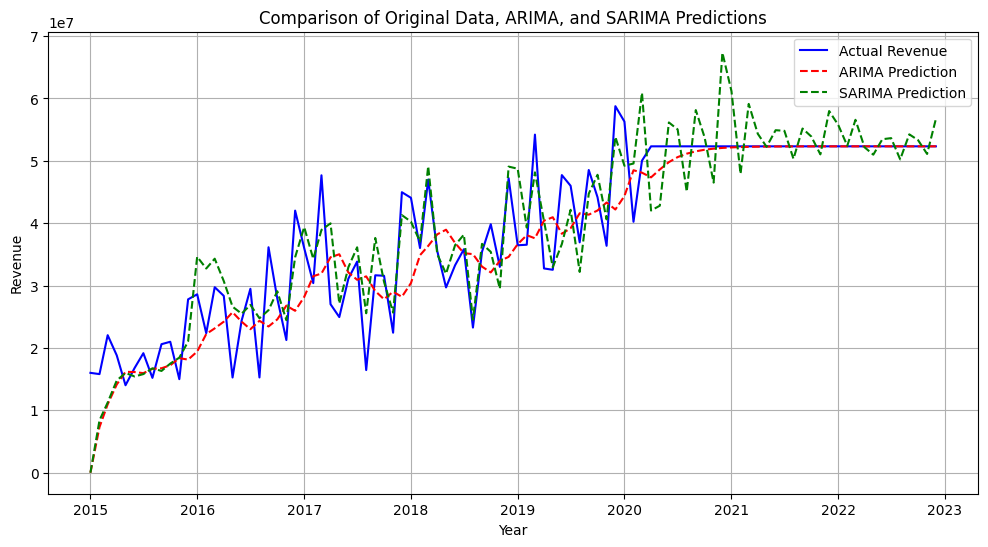


Forecasted Future Values:

         Date  ARIMA Forecast  SARIMA Forecast
0  2023-01-31    5.232068e+07     5.497555e+07
1  2023-02-28    5.232068e+07     5.303717e+07
2  2023-03-31    5.232068e+07     5.639994e+07
3  2023-04-30    5.232068e+07     5.379950e+07
4  2023-05-31    5.232068e+07     5.281107e+07
5  2023-06-30    5.232068e+07     5.450495e+07
6  2023-07-31    5.232068e+07     5.489650e+07
7  2023-08-31    5.232068e+07     5.244814e+07
8  2023-09-30    5.232068e+07     5.521318e+07
9  2023-10-31    5.232068e+07     5.489325e+07
10 2023-11-30    5.232068e+07     5.332886e+07
11 2023-12-31    5.232068e+07     5.756994e+07


<ipython-input-16-26372a1aa7bb>:50: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(df.index[-1], periods=future_steps+1, freq='M')[1:]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/TS/Exp8/Month_Value_1.csv"
df = pd.read_csv(file_path)

# Convert 'Period' column to datetime and set as index
df['Period'] = pd.to_datetime(df['Period'], format="%d.%m.%Y")
df.set_index('Period', inplace=True)

# Handle missing values using forward fill
df['Revenue'] = df['Revenue'].fillna(method='ffill')

# Fit ARIMA model (p,d,q)
arima_model = ARIMA(df['Revenue'], order=(1,1,1))  # Adjust parameters as needed
arima_result = arima_model.fit()

# Fit SARIMA model (p,d,q)(P,D,Q,s)
sarima_model = SARIMAX(df['Revenue'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()

# Generate in-sample predictions
df['ARIMA_Predicted'] = arima_result.fittedvalues
df['SARIMA_Predicted'] = sarima_result.fittedvalues

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Revenue'], label='Actual Revenue', color='blue')
plt.plot(df.index, df['ARIMA_Predicted'], label='ARIMA Prediction', linestyle='dashed', color='red')
plt.plot(df.index, df['SARIMA_Predicted'], label='SARIMA Prediction', linestyle='dashed', color='green')
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.title("Comparison of Original Data, ARIMA, and SARIMA Predictions")
plt.legend()
plt.grid()
plt.show()

# Forecast future values
future_steps = 12  # Number of months to forecast
arima_forecast = arima_result.forecast(steps=future_steps)
sarima_forecast = sarima_result.forecast(steps=future_steps)

# Create future index
future_dates = pd.date_range(df.index[-1], periods=future_steps+1, freq='M')[1:]

# Combine forecasted values into a DataFrame
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'ARIMA Forecast': arima_forecast.values,
    'SARIMA Forecast': sarima_forecast.values
})

# Print forecasted values
print("\nForecasted Future Values:\n")
print(forecast_df)
